# Import data

Working with 567 sets of images
Working with 7353 images
Image examples: 


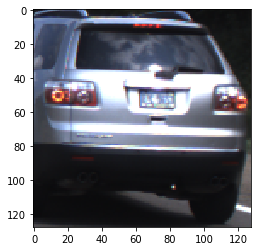

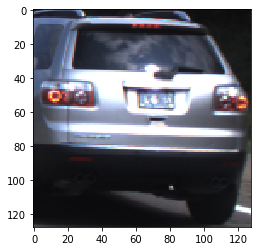

In [9]:
from load_dataset import load_dataset
from matplotlib import pyplot as plt

sequence_limit = 12
X_train, Y_train, image_count = load_dataset(sequence_limit = sequence_limit + 1)

print("Working with {0} sets of images".format(len(X_train)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    image = X_train[0][i]
    plt.imshow(image)
    plt.show()

# Layer structure

<img src="images/layer_structure.png">

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Conv2D, Dense, LSTM,MaxPooling2D , Flatten, TimeDistributed

model = Sequential()
model.add(TimeDistributed(Conv2D(filters=96, kernel_size=7,  strides=2, padding='valid'), input_shape=(3,227,227,12))) # last input parameter is image sequence length
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(filters=384, kernel_size=3,  strides=2, padding='valid')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(filters=512, kernel_size=3, padding='same')))
model.add(TimeDistributed(Conv2D(filters=512, kernel_size=3, padding='same')))
model.add(TimeDistributed(Conv2D(filters=384, kernel_size=3, padding='same')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(4096)))
#model.add(Reshape((x,y)))
model.add(LSTM(256, return_sequences=True)) #pole kindel return_sequence's
model.add(TimeDistributed(Dense(2)))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#model.fit(X_train, Y_train, epochs=3, batch_size=64)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_65 (TimeDis (None, 3, 111, 111, 96)   56544     
_________________________________________________________________
time_distributed_66 (TimeDis (None, 3, 55, 55, 96)     0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, 3, 27, 27, 384)    332160    
_________________________________________________________________
time_distributed_68 (TimeDis (None, 3, 13, 13, 384)    0         
_________________________________________________________________
time_distributed_69 (TimeDis (None, 3, 13, 13, 512)    1769984   
_________________________________________________________________
time_distributed_70 (TimeDis (None, 3, 13, 13, 512)    2359808   
_________________________________________________________________
time_distributed_71 (TimeDis (None, 3, 13, 13, 384)   

# Development construct NN

In [2]:
import keras
from keras.layers import Input, Conv2D, Dense, LSTM,MaxPooling2D , Flatten

x = Input(shape=(227,227,3)) #(32, 32, 3))
print('x', x.shape)
c1 = keras.layers.Conv2D(filters=96, kernel_size=7, strides=2, padding='valid')(x)
print('c1',c1.shape, 'expected (111,111,96)')
p1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(c1)
print('p1', p1.shape,'expected (55,55,96)')
c2 = keras.layers.Conv2D(filters=384, kernel_size=3, strides=2, padding='valid')(p1)
print('c2', c2.shape,'expected (26,26,384)')
p2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(c2)
print('p2', p2.shape,'expected (13,13,384)')
c3 = keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(p2)
print('c3', c3.shape,'expected (13,13,512)')
c4 = keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(c3)
print('c4', c4.shape,'expected (13,13,512)')
c5 = keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same')(c4)
print('c5', c5.shape,'expected (13,13,384)')
p5 = keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)
print('p5', p5.shape,'expected (6,6,384)')
f1 = keras.layers.Flatten()(p5)
print('flat', f1.shape)

#for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).
fc6 = keras.layers.Dense(4096)(f1) # dense layer == fully connected
print('fc1', fc1.shape)

#For LSTM if return_sequences would be True, then there would be three dimensions (batch_size, timesteps, units) as output. 
#return_sequences if False, then it produces only two outputs batch_size and units.

# TODO, mis on LSTM input?
#Keras LSTM takes and input with shape of (n_examples, n_times, n_features) and your layers input has to have this shape
lstm1 = keras.layers.LSTM(256, return_sequences=False)(fc6) 
print('lstm1', lstm1.shape)
fc8 = keras.layers.Dense(2)(lstm1) # dense layer == fully connected



x (None, 227, 227, 3)
c1 (None, 111, 111, 96) expected (111,111,96)
p1 (None, 55, 55, 96) expected (55,55,96)
c2 (None, 27, 27, 384) expected (26,26,384)
p2 (None, 13, 13, 384) expected (13,13,384)
c3 (None, 13, 13, 512) expected (13,13,512)
c4 (None, 13, 13, 512) expected (13,13,512)
c5 (None, 13, 13, 384) expected (13,13,384)
p5 (None, 6, 6, 384) expected (6,6,384)
flat (None, None)


NameError: name 'fc1' is not defined